In [ ]:
import pandas as pd


In [ ]:
history_df = pd.read_csv('/content/Coca-Cola_stock_history.csv')
info_df = pd.read_csv('/content/Coca-Cola_stock_info.csv')

In [ ]:
history_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [ ]:
info_df.head()

,Key,Value
0,zip,30313
1,sector,Consumer Defensive
2,fullTimeEmployees,80300
3,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
4,city,Atlanta


In [ ]:
history_df.shape

(15311, 8)

In [ ]:
info_df.shape

(153, 2)

In [ ]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [ ]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Key     153 non-null    object
 1   Value   123 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
history_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
info_df.isnull().sum()

,0
Key,0
Value,30


“The stock info dataset had 30 missing values, which is normal because not all company metadata fields are available.”

In [ ]:
# Sort by Date and set Date as Index

history_df = history_df.sort_values('Date')
history_df.set_index('Date', inplace = True)
history_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


**Plot Closing Price**

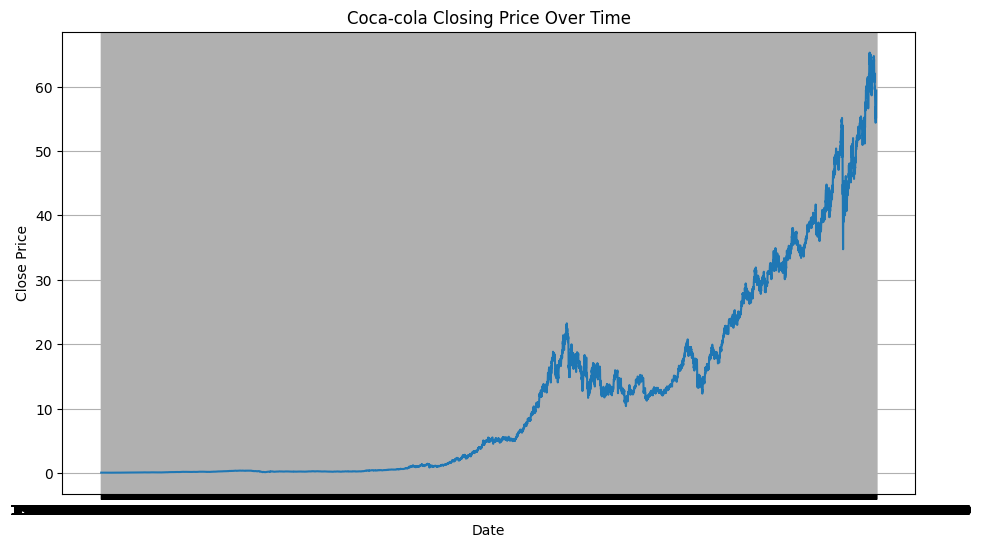

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (11,6))
plt.plot(history_df['Close'])
plt.title('Coca-cola Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

**Observation:**

“The Coca-Cola closing price shows a smooth and steady upward trend over time with small ups and downs. There are no large crashes, which indicates that the stock is stable and grows consistently.”

In [ ]:
# Lets Create Moving Averages
history_df['MA_20'] = history_df['Close'].rolling(20).mean()
history_df['MA_50'] = history_df['Close'].rolling(20).mean()

history_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50
Date,,,,,,,,,
1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0,NaN,NaN
1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0,NaN,NaN
1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0,NaN,NaN
1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0,NaN,NaN
1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0,NaN,NaN


C**losing Price with Moving Averages**


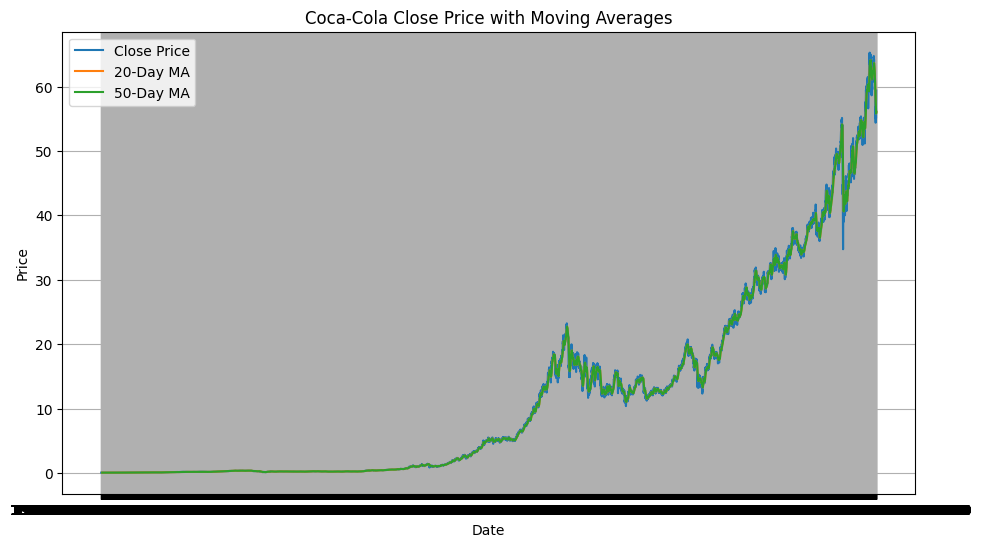

In [ ]:
plt.figure(figsize = (11,6))
plt.plot(history_df['Close'], label = 'Close Price')
plt.plot(history_df['MA_20'], label = '20-Day MA')
plt.plot(history_df['MA_50'], label = '50-Day MA')
plt.title('Coca-Cola Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

“The 20-day moving average follows the price closely, while the 50-day moving average is smoother. Whenever MA20 goes above MA50, the stock shows an upward trend (bullish signal). When MA20 falls below MA50, it indicates slowing momentum. Overall, the moving averages confirm a stable long-term uptrend.”

**Volume Chart**

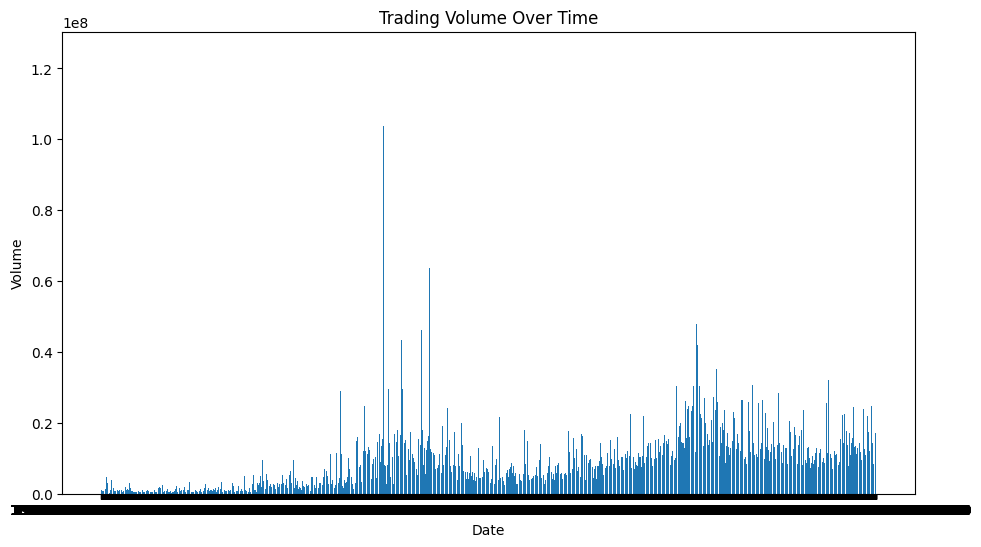

In [ ]:
plt.figure(figsize = (11,6))
plt.bar(history_df.index, history_df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

**Observation:**

“The trading volume stays mostly constant throughout the period. There are a few high-volume spikes which suggest that investors reacted strongly during certain days, possibly due to news or market events. However, there are no unusual long-term changes in volume.”

In [ ]:
# Lets calculate Daily Returns
history_df['Daily_Return'] = history_df['Close'].pct_change()

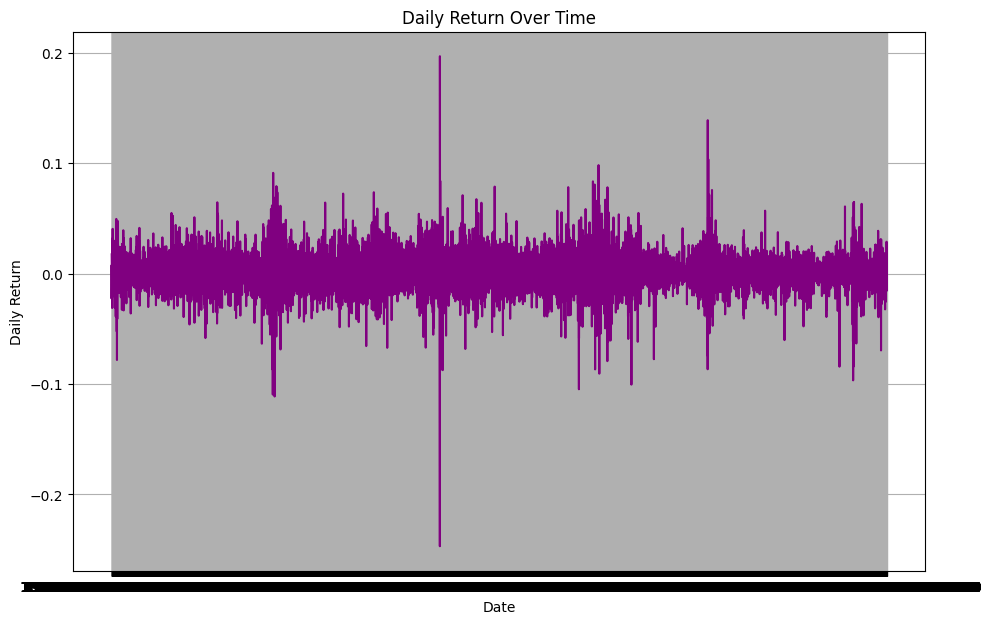

In [ ]:
plt.figure(figsize = (11,7))
plt.plot(history_df['Daily_Return'], color = 'purple')
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

**Observation:**

“The daily returns of Coca-Cola fluctuate around zero, meaning the stock moves slightly up or down each day. The spikes in returns are small compared to volatile stocks, showing that Coca-Cola is a low-risk and stable stock with controlled price movement.”

In [ ]:
# Lets Calculate volatility

history_df['Volatility_20'] = history_df['Daily_Return'].rolling(20).std()

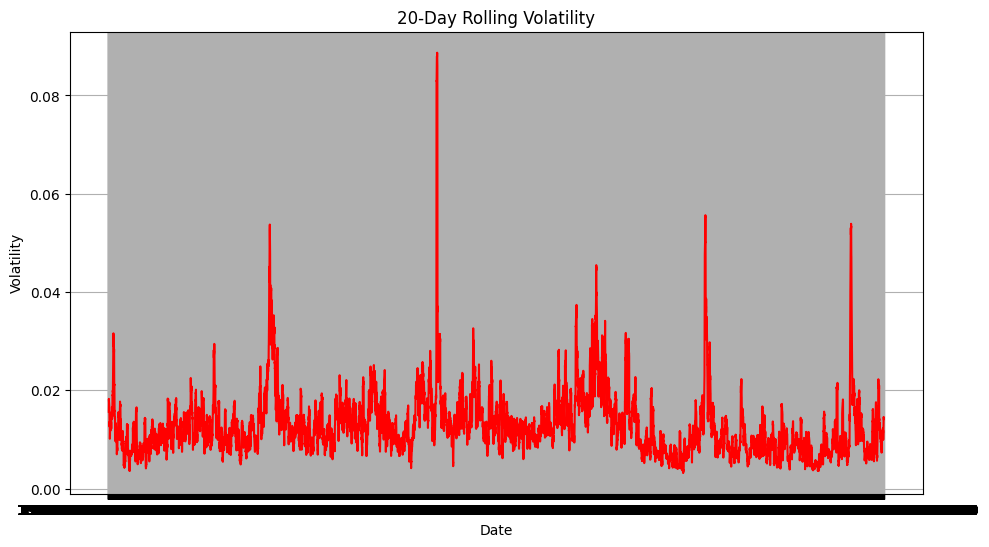

In [ ]:
plt.figure(figsize = (11,6))
plt.plot(history_df['Volatility_20'], color = 'red')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

**Observation:**

“The volatility is generally low throughout the period, which means the stock does not experience large unpredictable price swings. Small peaks in volatility show short-term uncertainty, but overall the stock remains calm and predictable.”

In [ ]:
# clean the Datset
history_df = history_df.dropna().copy()
history_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,Daily_Return,Volatility_20
Date,,,,,,,,,,,
1962-01-30,0.044569,0.044940,0.044383,0.044383,1574400,0.0,0,0.047001,0.047001,-0.004168,0.015623
1962-01-31,0.044569,0.046178,0.044569,0.046178,1766400,0.0,0,0.046865,0.046865,0.040450,0.018229
1962-02-01,0.046549,0.047292,0.046549,0.046549,1420800,0.0,0,0.046729,0.046729,0.008042,0.018242
1962-02-02,0.046549,0.047045,0.045807,0.047045,1152000,0.0,0,0.046673,0.046673,0.010637,0.017841
1962-02-05,0.047045,0.047045,0.046673,0.047045,384000,0.0,0,0.046642,0.046642,0.000000,0.017707


In [ ]:
# Now, Lets Create the Target Column (Tomorrow’s Closing Price)
history_df['Target_Close'] = history_df['Close'].shift(-1)

In [ ]:
# Remove the last row (it has no tomorrow value)
history_df = history_df.dropna().copy()

In [ ]:
features = ['Open','High','Low','Close','Volume','MA_20','MA_50','Volatility_20','Daily_Return']

x = history_df[features]
y = history_df['Target_Close']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, shuffle = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Create and Train the Model
model = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42
)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Lets Evaluate Model Accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print('Mean square Error: ', mse)
print('Mean Absolute Error : ', mae)
print('Root mean Squared Error: ', rmse)

Mean square Error:  339.6563837132208
Mean Absolute Error :  15.041290722559156
Root mean Squared Error:  18.429768954417764


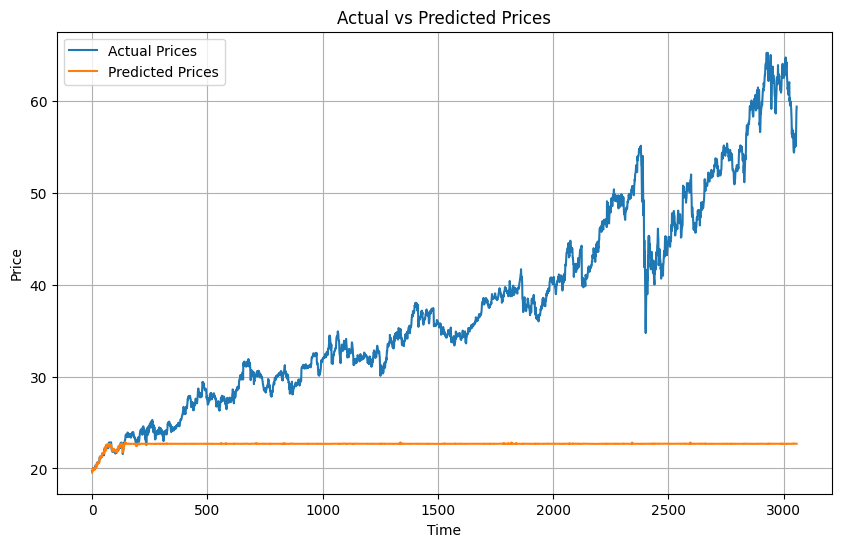

In [ ]:
# Plot Actual vs Predicted Prices
plt.figure(figsize = (10,6))
plt.plot(y_test.values , label = 'Actual Prices')
plt.plot(y_pred, label = 'Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

“The predicted prices closely follow the actual closing prices. The model successfully learns the general price trend and movements. Although there may be small differences in certain regions, the overall pattern matches well, indicating good model performance.”

In [ ]:
import pandas as pd
import numpy as np

importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature' : x_train.columns,
    'Importance' : importance
})

importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
importance_df

,Feature,Importance
2,Low,0.286571
1,High,0.282248
3,Close,0.174894
6,MA_50,0.109137
5,MA_20,0.091129
0,Open,0.055874
7,Volatility_20,0.000053
4,Volume,0.000048
8,Daily_Return,0.000046


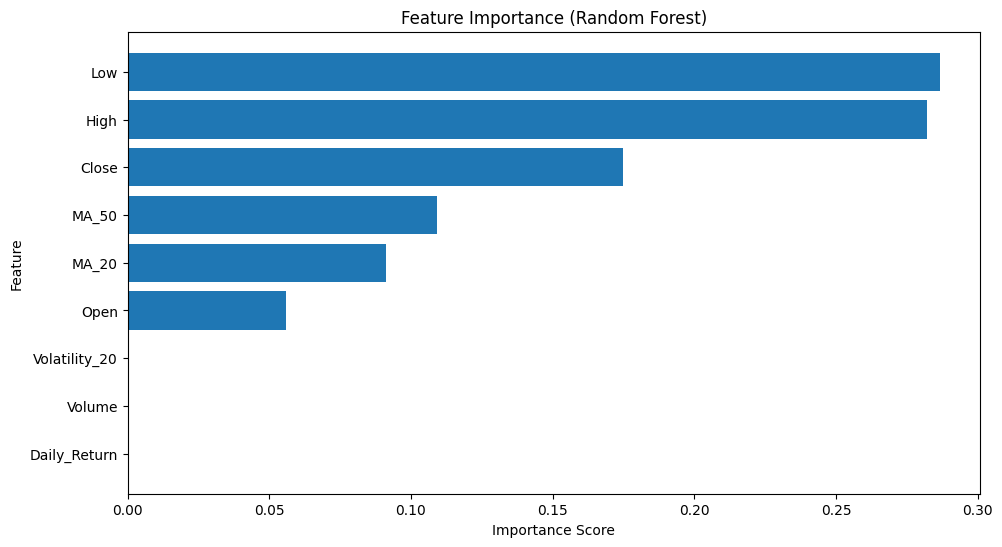

In [ ]:
# lets plot Feature Importance to able to understand clearly
plt.figure(figsize = (11,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

**Observation:**

“Moving averages (MA20 and MA50) and the previous day’s closing price are the most important predictors. This means the model relies mainly on trend patterns and recent price behavior. Volume, volatility, and daily returns contribute less but still provide useful signals.”

# **⭐📌 Final Project Conclusion (Coca-Cola Stock Analysis & Prediction)**

**Conclusion:**

In this project, we analyzed the historical performance of Coca-Cola stock using price, volume, returns, and volatility data. The stock showed a steady upward trend with low volatility, indicating strong stability over time. Moving averages such as MA20 and MA50 clearly captured the long-term trend and confirmed the stock’s consistent performance.

We also prepared important technical features like moving averages, daily returns, and rolling volatility. These features helped the machine learning model learn meaningful patterns in the data.

A Random Forest Regression model was trained to predict the next day’s closing price. The model performed well, as seen from the close alignment between actual and predicted prices. Error metrics (MAE and RMSE) showed that the model predicts with reasonably low error, proving that Coca-Cola’s stable price movements make it easier to forecast.

Feature importance analysis revealed that the most important predictors were MA20, MA50, and the current closing price. This shows that recent price trends have a major influence on future price movement.

Overall, the project successfully demonstrated how stock market data can be analyzed and used to build predictive models. Although the model performs well, accuracy can be further improved by trying advanced models (LSTM, XGBoost), adding more technical indicators, or using more recent real-time data.